### Preparing a raw Phoenix Grid installation ###

This is needed for making custom StarKit grids - not suitable for most users. 

You first need to navigate to the Phoenix folder that contains the grid ('PHOENIX-ACES-AGSS-COND-2011')

In [2]:
from starkit.gridkit.io.phoenix import make_grid_info
from starkit.gridkit.io.phoenix import PhoenixProcessGrid
from starkit.gridkit import load_grid
import pandas as pd
from astropy import units as u, constants as const
from astropy.io import fits
import numpy as np
import uuid

### Create the indicies ###

In [4]:
meta = pd.read_hdf('phoenix_grid_info.h5', 'meta')
raw_index = pd.read_hdf('phoenix_grid_info.h5', 'index')
wavelength = pd.read_hdf('phoenix_grid_info.h5', 'wavelength')[0].values * u.Unit(meta['wavelength_unit'])

In [6]:
sun_flux = fits.getdata(raw_index.loc[487]['filename']) * u.erg/u.s/u.cm**2/u.cm
sun_header = fits.getheader(raw_index.loc[487]['filename'])
sun_lum_dens = sun_flux * (4 * np.pi * (sun_header['PHXREFF'] * u.cm)**2)


In [47]:
(np.trapz(sun_lum_dens, wavelength).to('W') / const.L_sun).to(1)

<Quantity 0.8778772740616984>

In [ ]:
index_filter = (raw_index.teff.between(2000, 20000) &
 raw_index.logg.between(-1, 5) &
 raw_index.mh.between(-1.5, 0.5) &
 (raw_index.alpha == 0.0))

In [7]:
index_filter = (raw_index.teff.between(2000, 20000) &
 raw_index.logg.between(-1, 5) &
 raw_index.mh.between(-1.5, 0.5) &
 (raw_index.alpha == 0.0))

new_index = raw_index.loc[index_filter]

In [8]:
pgrid = PhoenixProcessGrid(new_index, wavelength, meta, 
                           wavelength_start=2000*u.angstrom, 
                           wavelength_stop=9000*u.angstrom, R=10000,
                          R_sampling=4)

In [ ]:
pgrid.to_hdf('phoenix_working_v1_fixed_units.h5', overwrite=True)

 46% (1801 of 3833) |#########            | Elapsed Time: 3:43:20 ETA:  3:28:26

In [15]:
phoenix_grid = load_grid('phoenix_working_v1_fixed_units.h5')

starkit.gridkit.base - INFO - Reading index
starkit.gridkit.base - INFO - Discovered columns teff, logg, mh
starkit.gridkit.base - INFO - Reading Fluxes
starkit.gridkit.base - INFO - Fluxes shape (3833, 60164)
starkit.gridkit.base - INFO - Initializing spec grid
starkit.gridkit.base - INFO - Setting grid extent


In [11]:
phoenix_grid.teff = 5780.
phoenix_grid.logg = 4.4
phoenix_grid.mh = 0.0

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


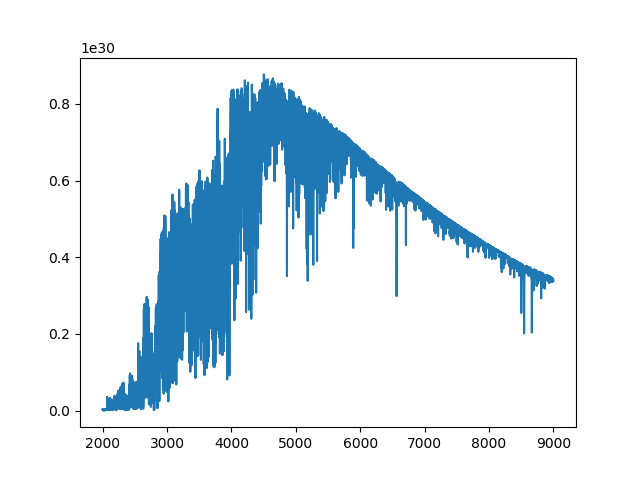

In [12]:
%pylab notebook

w, f = phoenix_grid()

plot(w, f)